In [5]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# 讀取資料
df1 = pd.read_csv('L9_Train.csv')
df2 = pd.read_csv('L9_Train_2.csv')
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)

Shape of df1: (89612, 8)
Shape of df2: (11699, 8)


In [ ]:
# 合併處理
df = pd.concat([df1, df2], ignore_index=True)
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,9,2024-02-21 06:07:42.000,0.0,1013.37,22.68,74.51,21.67,0.00
1,9,2024-02-21 06:08:42.000,0.0,1013.38,22.64,74.77,28.33,0.00
2,9,2024-02-21 06:09:42.000,0.0,1013.41,22.63,74.72,35.00,0.01
3,9,2024-02-21 06:10:42.000,0.0,1013.43,22.63,74.89,44.17,0.00
4,9,2024-02-21 06:11:43.000,0.0,1013.46,22.63,74.71,54.17,0.00
...,...,...,...,...,...,...,...,...
101306,9,2024-10-18 14:27:02.000,0.0,1006.65,33.09,52.98,5280.83,6.71
101307,9,2024-10-18 14:28:02.000,0.0,1006.67,33.07,53.42,4965.00,5.74
101308,9,2024-10-18 14:29:02.000,0.0,1006.68,32.92,53.73,4709.17,5.13
101309,9,2024-10-18 14:30:02.000,0.0,1006.70,32.92,53.55,4480.00,4.69


In [9]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,101311.0,101311.000000,101311.000000,101311.000000,101311.000000,101311.000000,101311.000000
mean,9.0,0.120064,1007.469323,29.835744,66.269521,15626.050013,142.062050
std,0.0,0.422047,5.287252,6.024276,17.467801,26784.183436,366.966408
min,9.0,0.000000,993.480000,15.980000,13.570000,20.000000,0.000000
25%,9.0,0.000000,1003.910000,26.380000,56.320000,2349.170000,1.140000
50%,9.0,0.000000,1006.540000,29.990000,66.580000,5725.000000,6.810000
75%,9.0,0.000000,1010.580000,33.180000,77.110000,12626.670000,31.650000
max,9.0,6.450000,1022.740000,52.480000,100.000000,117758.200000,2144.140000


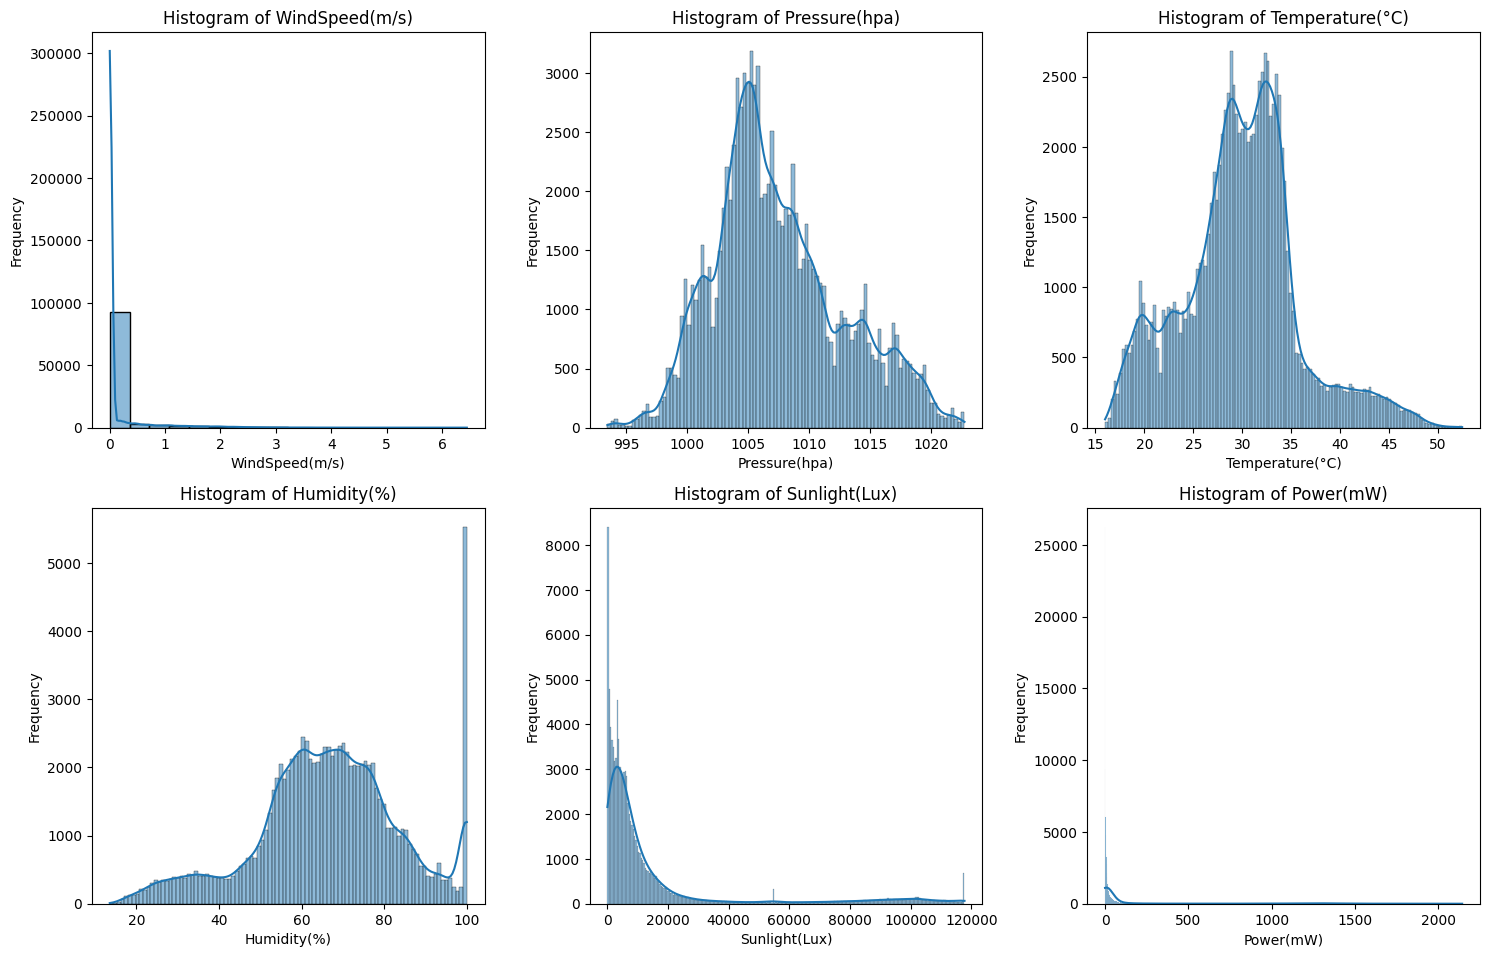

In [ ]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
204,9,2024-02-21 09:32:44.000,0.00,1014.54,44.56,19.72,117758.2,1546.82
205,9,2024-02-21 09:33:44.000,0.17,1014.52,44.38,20.32,117758.2,1542.55
206,9,2024-02-21 09:34:44.000,0.00,1014.56,44.59,19.03,117758.2,1541.83
207,9,2024-02-21 09:35:44.000,0.00,1014.55,44.75,18.47,117758.2,1547.54
208,9,2024-02-21 09:36:44.000,0.00,1014.52,44.59,17.82,117758.2,1548.99
...,...,...,...,...,...,...,...,...
98290,9,2024-10-08 11:17:05.000,0.00,1008.95,38.87,42.19,117758.2,1599.05
99004,9,2024-10-15 11:38:58.000,0.00,1009.30,42.87,32.07,117758.2,1464.10
100314,9,2024-10-17 09:35:04.000,0.00,1011.34,46.72,28.70,117758.2,1303.28
101079,9,2024-10-18 10:40:26.000,0.00,1009.11,47.61,25.78,117758.2,1305.64


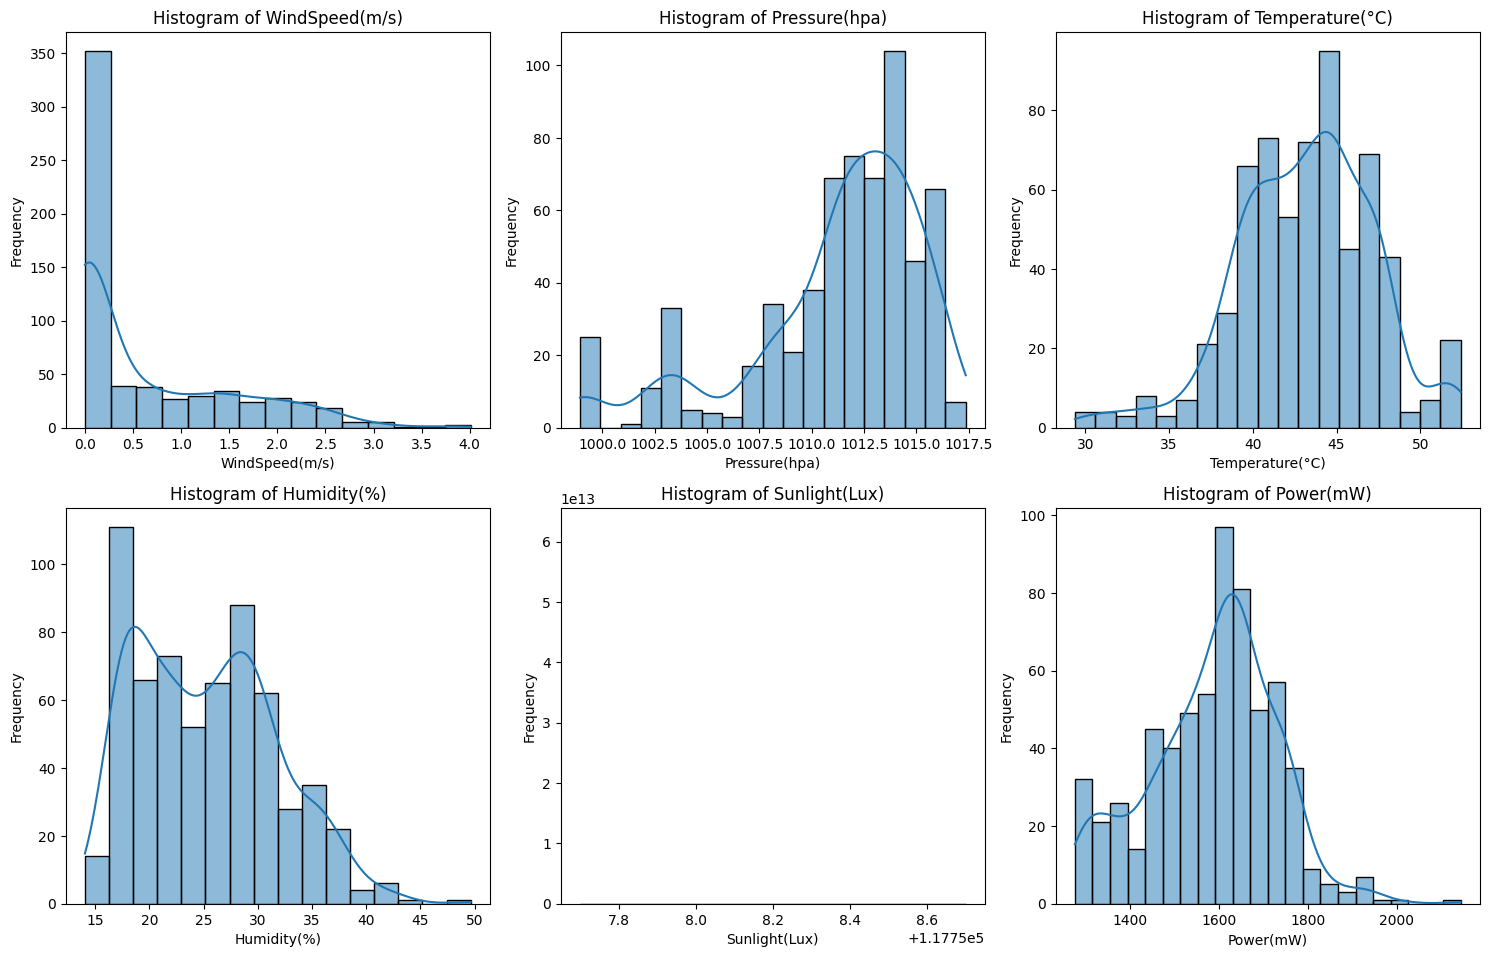

In [ ]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [14]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0129 * Sunlight(Lux) + -59.6121


In [15]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0129
intercept = -59.6121

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [16]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,101311.0,101311.000000,101311.000000,101311.000000,101311.000000,101311.000000,101311.000000
mean,9.0,0.120064,1007.469323,29.835744,66.269521,15687.333845,142.062050
std,0.0,0.422047,5.287252,6.024276,17.467801,27041.960405,366.966408
min,9.0,0.000000,993.480000,15.980000,13.570000,20.000000,0.000000
25%,9.0,0.000000,1003.910000,26.380000,56.320000,2349.170000,1.140000
50%,9.0,0.000000,1006.540000,29.990000,66.580000,5725.000000,6.810000
75%,9.0,0.000000,1010.580000,33.180000,77.110000,12626.670000,31.650000
max,9.0,6.450000,1022.740000,52.480000,100.000000,170833.496124,2144.140000


In [17]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [18]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240221060709,0.0,1013.42,22.64,74.67,67.83,0.00
1,20240221061709,0.0,1013.56,22.11,76.42,299.42,0.03
2,20240221062709,0.0,1013.71,21.99,76.76,734.83,0.11
3,20240221063709,0.0,1013.85,22.37,74.99,1365.83,0.31
4,20240221064709,0.0,1013.90,22.67,73.85,2196.17,0.79
...,...,...,...,...,...,...,...
10127,20241018135209,0.0,1006.91,33.58,51.70,6619.08,9.91
10128,20241018140209,0.0,1006.89,33.76,51.24,7525.33,13.45
10129,20241018141109,0.0,1006.74,32.99,52.82,4803.92,5.32
10130,20241018142109,0.0,1006.69,33.06,53.21,5448.00,7.13


# HEATMAP

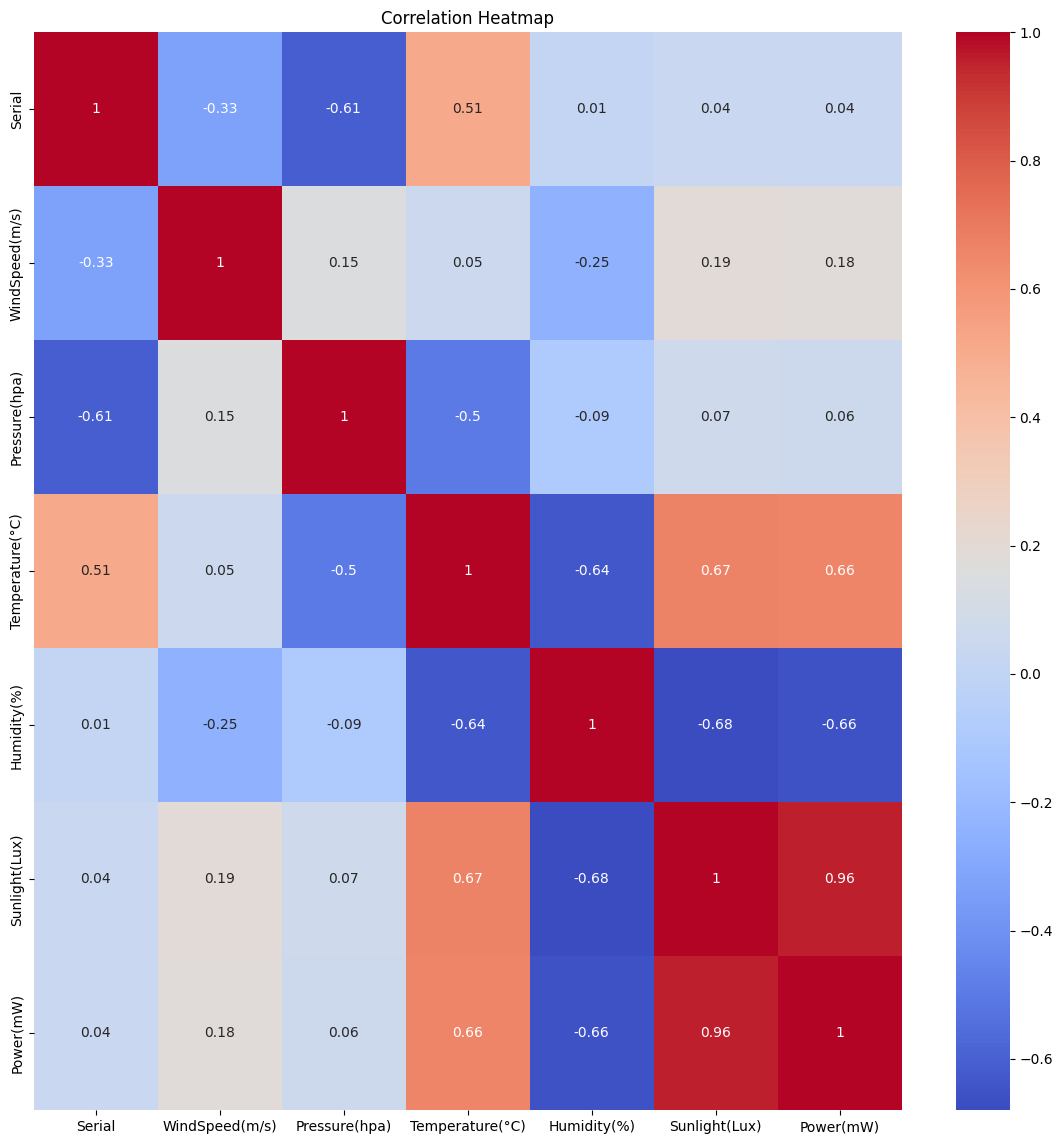

In [ ]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.957108
Temperature(°C)    0.660542
Humidity(%)        0.659898
WindSpeed(m/s)     0.176470
Pressure(hpa)      0.056603
Serial             0.044957
Name: Power(mW), dtype: float64

In [21]:
df.to_csv('L9_Train_Revise.csv', index=False)